Zadanie 1 (7 pkt)

Korzystając z poniższego kodu oraz pliku president_heights.csv utwórz tablicę zawierającą wzrost prezydentów USA.

Korzystając z pakietu NumPy podaj:
- średni wzrost
- odchylenie standardowe
- najwyższy oraz najniższy wzrost:


In [12]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s /content/drive/MyDrive/PAD/PAD02/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv('PAD02/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

meanHeights = np.mean(heights)
standardDeviation = np.std(heights)
minValue = np.amin(heights)
maxValue = np.amax(heights)
percentile_25 = np.percentile(heights, 25)
percentile_75 = np.percentile(heights, 75)
median = np.median(heights)

print("Mean height:       ", meanHeights)
print("Standard deviation:", standardDeviation)
print("Minimum height:    ", minValue)
print("Maximum height:    ", maxValue)
print("25th percentile:   ", percentile_25)
print("Median:            ", percentile_75)
print("75th percentile:   ", median)


[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]
Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193
25th percentile:    174.25
Median:             183.0
75th percentile:    182.0


Zadanie 2 (4 pkt)

Wgraj dane z pliku Zadanie_2.csv.

a.	Znajdź wektory własne, oraz wartości własne dla zawartej w pliku macierzy

b.	Oblicz macierz odwrotną dla macierzy z pliku


In [20]:
import numpy as np
data_ex_2 = np.genfromtxt('PAD02/Zadanie_2.csv', delimiter=';')

vector, value = np.linalg.eig(data_ex_2)
print(vector)
print('============\n')
print(value)
print('============\n')
matrix_inverted = np.linalg.inv(data_ex_2)
print(matrix_inverted)

[104.34960192 +0.j         -23.35660516+18.84992811j
 -23.35660516-18.84992811j  15.92989017 +0.j
  -4.99456452 +0.j           0.35205717 +5.80125175j
   0.35205717 -5.80125175j  -1.03383491 +0.j
   3.87900166 +1.42651533j   3.87900166 -1.42651533j]

[[-0.29000475+0.j         -0.07545445+0.07743149j -0.07545445-0.07743149j
  -0.03544485+0.j          0.42681634+0.j         -0.22172831-0.29869259j
  -0.22172831+0.29869259j  0.41343726+0.j         -0.28670255+0.21891569j
  -0.28670255-0.21891569j]
 [-0.24163153+0.j          0.41229621+0.09197324j  0.41229621-0.09197324j
   0.45873475+0.j         -0.27056206+0.j         -0.01331344+0.1422557j
  -0.01331344-0.1422557j  -0.31591047+0.j          0.41954481-0.10561864j
   0.41954481+0.10561864j]
 [-0.41060573+0.j          0.37509638-0.00960818j  0.37509638+0.00960818j
   0.64067986+0.j         -0.37967609+0.j         -0.60525232+0.j
  -0.60525232-0.j          0.6457768 +0.j          0.63631555+0.j
   0.63631555-0.j        ]
 [-0.18899971+0.j  

Zadanie 3 (8 pkt)

Plik Seattle2014.csv zawiera informacje o rocznych opadach w Seattle w 2014. Wykorzystaj kod poniżej aby wczytać plik.

**Wykorzystując operatory logiczne znajdź dni, kiedy [PODAJ LICZBĘ TYCH DNI]:**

•	Nie padało

•	Padało

•	Spadło powyżej 0.5 cali (inch) deszczu

•	Spadło poniżej 0.2 cali (inch) deszczu, ale padało!


**Korzystając z maskowania policz następujące statystyki:**

•	Medianę opadów w deszczowe dni w 2014 roku

•	Medianę opadów latem w 2014 roku (czyli dni pomiędzy dniem 172 a 262)

•	Maksymalne opady latem 2014 roku

•	Maksymalne opady poza latem 2014 roku (czyli wiosna, jesień i zima)


Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75
Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 1.8385826771653544


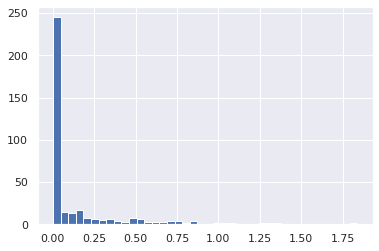

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

rainfall = pd.read_csv('PAD02/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/0mm -> inches
inches.shape

%matplotlib inline
plt.hist(inches, 40);

days_no_rain = 0
days_rain = 0
days_rain_0_2 = 0
days_rain_0_5 = 0
days_rain_arr = []
summer_days_arr = []
no_summer_days_arr = []
days_in_year = np.arange(365)

for x in days_in_year:
    if 172 <= x <= 262:
        summer_days_arr.append(inches[x])
    if x < 172 or x > 262:
        no_summer_days_arr.append(inches[x])
    if inches[x] == 0:
        days_no_rain += 1
    else:
        days_rain += 1
        days_rain_arr.append(inches[x])
        if inches[x] > 0.5:
            days_rain_0_5 += 1
        elif 0.0 < inches[x] < 0.2:
            days_rain_0_2 += 1

days_rainy_median = np.median(days_rain_arr)
days_summer_rainy_median = np.median(summer_days_arr)
max_precip_summer_day = np.amax(summer_days_arr)
days_non_summer_rainy_median = np.amax(no_summer_days_arr)

print("Number days without rain:      ", days_no_rain)
print("Number days with rain:         ", days_rain)
print("Days with more than 0.5 inches:", days_rain_0_5)
print("Rainy days with < 0.2 inches  :", days_rain_0_2)
print("Median precip on rainy days in 2014 (inches):   ", days_rainy_median)
print("Median precip on summer days in 2014 (inches):  ", days_summer_rainy_median)
print("Maximum precip on summer days in 2014 (inches): ", max_precip_summer_day)
print("Median precip on non-summer rainy days (inches):", days_non_summer_rainy_median)

Zadanie 4 (5 pkt)

Dane są dwa wektory A i B. 

A = [0,3,2,5]

B = [0,3,1,4]

Wykonaj następujące operacje:

•	Dodaj A i B

•	Odejmij B od A

•	Pomnóż wektor A przez skalar a=4

•	Oblicz iloczyn skalarny wektorów A i B

•	Znajdź długość wektora B

Te operacje można wykonać „ręcznie” w Pythonie, ale postaraj się znaleźć odpowiednie funkcje NumPy.


In [35]:
import numpy as np

A=[0,3,2,5]
B=[0,3,1,4]
a=4

vector_A = np.array(A)
vector_B = np.array(B)

A_B_sum = np.add(vector_A, vector_B)
B_A_sub = np.subtract(vector_B, vector_A)
vector_A_scalar = np.multiply(vector_A, a)
vector_A_B_dot = np.dot(vector_A, vector_B)
vector_B_length = np.linalg.norm(vector_B)

print("Dodaj A i B: ", A_B_sum)
print("Odejmij B od A: ", B_A_sub)
print("Pomnóż wektor A przez skalar a=4: ", vector_A_scalar)
print("Oblicz iloczyn skalarny wektorów A i B: ", vector_A_B_dot)
print("Znajdź długość wektora B: ", vector_B_length)


Dodaj A i B:  [0 6 3 9]
Odejmij B od A:  [ 0  0 -1 -1]
Pomnóż wektor A przez skalar a=4:  [ 0 12  8 20]
Oblicz iloczyn skalarny wektorów A i B:  31
Znajdź długość wektora B:  5.0990195135927845
